In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
font = {'family': 'IPAexGothic'}
matplotlib.rc('font', **font)
import os
import gspread as gs

from oauth2client.service_account import ServiceAccountCredentials


In [34]:
def create_google_client(path):
    scope = ['https://spreadsheets.google.com/feeds']
    path = os.path.expanduser(path)
    credentials = ServiceAccountCredentials.from_json_keyfile_name(path, scope)
    client = gs.authorize(credentials)
    return client


In [35]:

path = '/Users/kkd/.credential/Dataprep-770b3144dc97.json'
doc_url = 'https://docs.google.com/spreadsheets/d/1h-GFHoNa55P96wu_HNbPk899eN4HZcnu1T9q4eag8Uc/edit?usp=sharing'

client = create_google_client(path)
gfile = client.open_by_url(doc_url)
worksheet = gfile.worksheet('volunteer')
records = worksheet.get_all_values()
cols_name = records[0]
data = records[1:]
df = pd.DataFrame(data=data, columns=cols_name)
df

,Date,今治市,宇和島市,大洲市,西予市,松野町,鬼北町,松山市,八幡浜市
0,2018-07-10,,35,82,,,,,
1,2018-07-11,71,76,177,201,,9,85,7
2,2018-07-12,50,74,284,180,13,12,38,8
3,2018-07-13,41,198,333,267,33,9,87,15
4,2018-07-14,131,415,587,823,27,88,309,50
5,2018-07-15,126,374,1099,1081,44,56,262,36
6,2018-07-16,102,305,491,591,37,50,232,29
7,2018-07-17,37,157,222,210,4,3,100,
8,2018-07-18,37,241,205,149,4,0,88,14
9,2018-07-19,58,190,174,294,8,0,89,14


## Excelデータを元にグラフを出力

Excelファイルは[Google Drive](https://docs.google.com/spreadsheets/d/1h-GFHoNa55P96wu_HNbPk899eN4HZcnu1T9q4eag8Uc/edit#gid=0)からダウンロードした後で読み込んでいる。
(直接読み込むようにしたい。。。）

,今治市,宇和島市,大洲市,西予市,松野町,鬼北町,松山市,八幡浜市
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,63.363636,199.363636,348.090909,361.181818,16.363636,20.636364,126.545455,16.181818
std,40.665151,124.425297,290.244536,329.901748,15.945361,30.017571,97.007591,15.848143
min,0.000000,35.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,102.000000,176.000000,178.500000,4.000000,0.000000,86.000000,6.000000
50%,50.000000,190.000000,222.000000,210.000000,10.000000,9.000000,89.000000,14.000000
75%,86.500000,273.000000,412.000000,442.500000,30.000000,31.000000,167.000000,22.000000
max,131.000000,415.000000,1099.000000,1081.000000,44.000000,88.000000,309.000000,50.000000


Text(0.5,0,'月日')

Text(0,0.5,'人数')

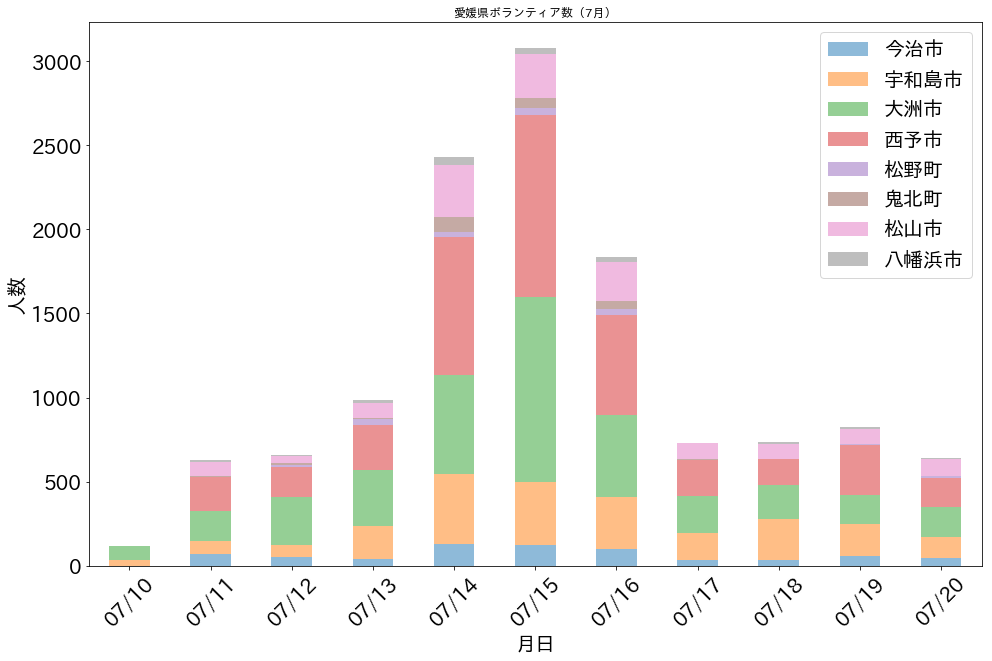

In [36]:
# df = pd.read_excel('assets/data/ehime_volunteer.xlsx')
df.replace('', 0, inplace=True)
df.fillna(0, inplace=True)

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df2 = df.set_index('Date')
df2.index.names = ['Date']

df2.index = df2.index.strftime("%m/%d")
df2 = df2.applymap(int)
df2.describe()

ax = df2.plot(
                        kind='bar', 
                        figsize=(16,10), 
                        alpha=0.5,
                        title="愛媛県ボランティア数（7月）", 
                        subplots=False, 
                        stacked=True,
                        fontsize=20)

plt.xlabel("月日", fontsize="20")
plt.ylabel("人数", fontsize="20")
plt.legend(fontsize="20")
fig = ax.get_figure()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show() 
fig.savefig('assets/images/volunteer_count.png')





In [43]:
!pip install tabulate
from tabulate import tabulate

df.Date.strftime('%m/%d')

print(tabulate(df, tablefmt="markdown", headers="keys", showindex=False))

AttributeError: 'Series' object has no attribute 'strftime'